In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import torch, IPython, itertools, string
import random, time, warnings
import matplotlib.pyplot as plt
from matplotlib import animation
from munch import Munch
import geomsolver as gs
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
if False:
    
    x_widget = widgets.FloatSlider(min=0.0, max=10.0, step=0.05)
    y_widget = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=4.0)

    def update_x_range(*args):
        x_widget.max = 2.0 * y_widget.value
    y_widget.observe(update_x_range, 'value')

    def printer(x, y):
        print(x, y)
    interact(printer,x=x_widget, y=y_widget);

In [4]:
warnings.simplefilter('ignore')

<IPython.core.display.Javascript object>


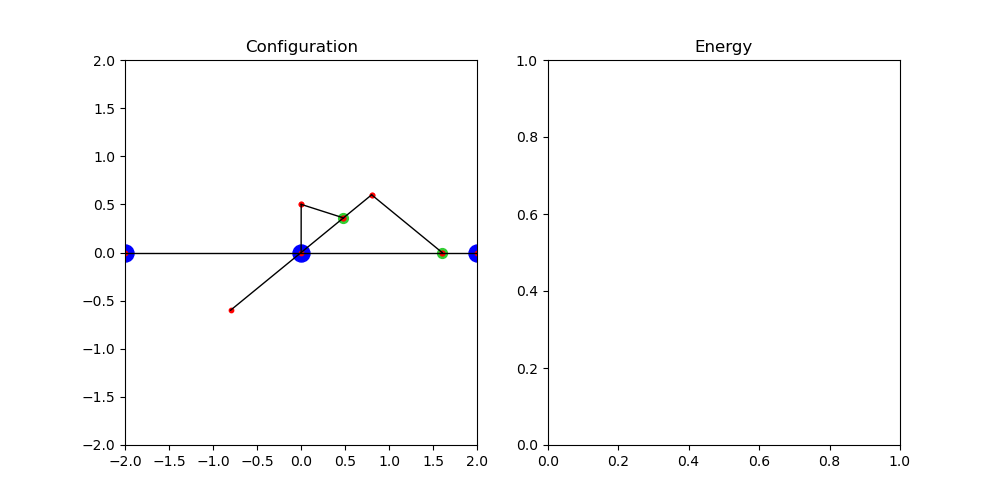

In [5]:
linkage = gs.Linkage(show_origin=False)

In [6]:
A = linkage.add_anchorpoint(at=[0,0,0])
B = linkage.add_anchorpoint(at=[-2,0,0])
C = linkage.add_anchorpoint(at=[2,0,0])
bc = linkage.add_frompointsline(B, C)

In [7]:
de = A.add_onpointline(L=2, theta=90, beta=0.5)
#de.params.beta.lock()

In [8]:
ef = de.p2.add_frompointline(L=1, theta=0)

In [9]:
G = bc.add_onlinepoint(alpha=0.9)
G.lock()

In [10]:
fg = linkage.add_frompointsline(ef.p2, G)

In [11]:
fg.constrain_length(0)

In [12]:
ah = A.add_frompointline(L=0.5, theta=120)

In [13]:
hi = ah.p2.add_frompointline(L=0.5, theta=10)

In [14]:
J = de.add_onlinepoint(alpha=0.8)
J.lock()

In [15]:
ij = linkage.add_frompointsline(hi.p2, J)

In [16]:
ij.constrain_length(0.3)

In [17]:
ij.constrain_length(0.2)

In [18]:
ij.constrain_length(0.1)

In [19]:
fg.constrain_length(0)

In [20]:
ij.constrain_length(0)

In [21]:
'''
E = linkage.add_atpoint(at=[1,1,0])
E.lock()
z = linkage.add_frompointsline(E, b.p2)
linkage.create_controller(manual=True)
''';